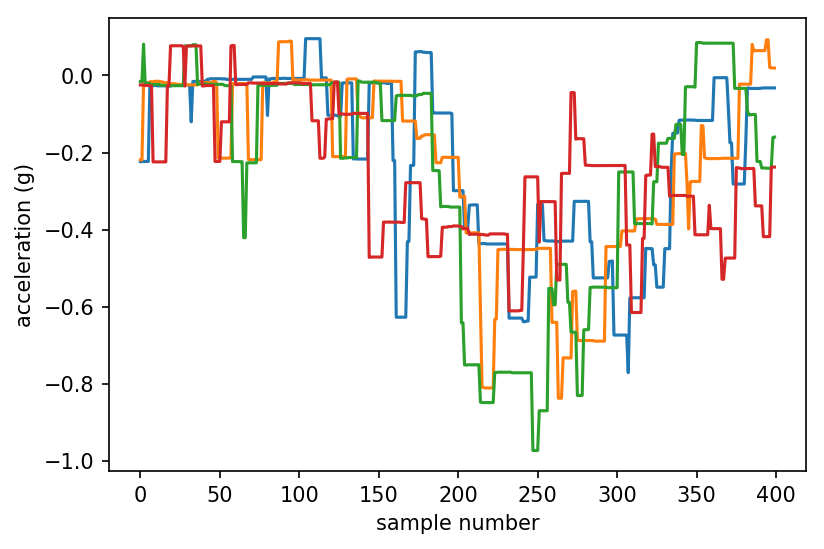

(5, 400)


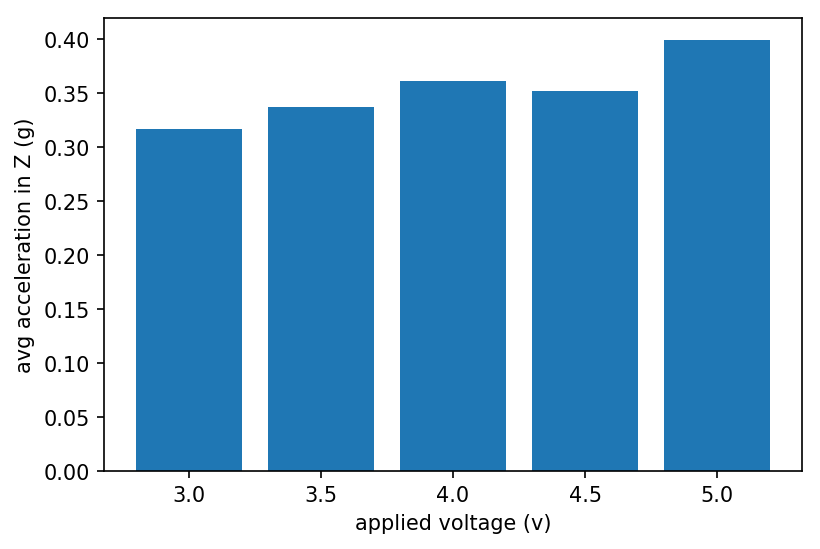

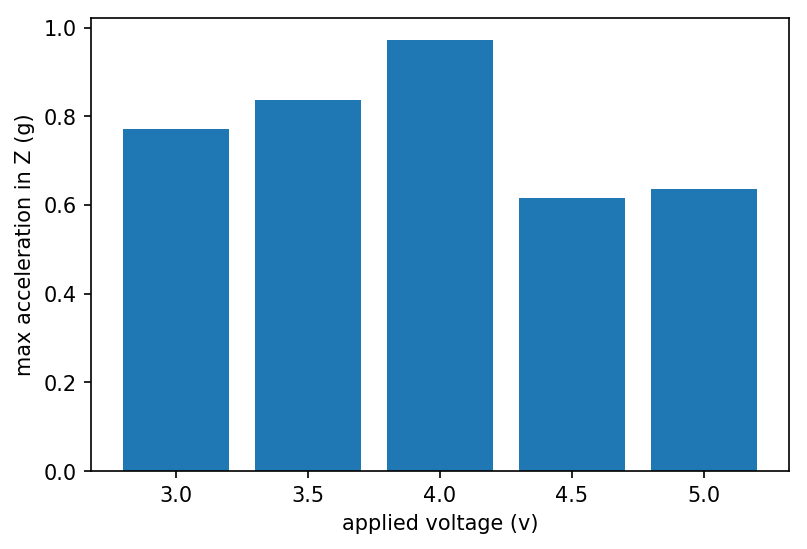

In [4]:
import time,pickle,time,math,sys,pickle,time
import numpy as np
from PIL import Image
from scipy import stats
from matplotlib.pyplot import imshow
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
mpl.rcParams['figure.dpi']= 150

def reader(name):
    motor_move = []
    with open(name, "rb") as f:
        motor_move = np.array(pickle.load(f))
    #frames = len(data)
    #print(motor_move.shape)
    motor_move = np.average(motor_move, axis=0)
    #print(motor_move.shape)
    #motor_move = np.sum(np.rot90(motor_move), axis=0)/9.8
    motor_move = motor_move[:,2]/9.8
    return motor_move

data = []
for i in ["3_0","3_5","4_0","4_5","5_0"]:
    data.append(reader("gathered_data_{}.pickle".format(i)) )
data = np.array(data)
time = np.arange(0,len(data[0]),1)

plt.plot(time, data[0])
plt.plot(time, data[1])
plt.plot(time, data[2])
plt.plot(time, data[3])
plt.xlabel("sample number")
plt.ylabel("acceleration (g)")
plt.show()
print(data.shape)
avg_data = -1*np.average(data[:,150:], axis=1)
plt.bar([3,3.5,4,4.5,5],avg_data, width=0.4)
plt.xlabel("applied voltage (v)")
plt.ylabel("avg acceleration in Z (g)")
plt.show()

max_data = np.max(np.abs(data[:,150:]), axis=1)
plt.bar([3,3.5,4,4.5,5],max_data, width=0.4)
plt.xlabel("applied voltage (v)")
plt.ylabel("max acceleration in Z (g)")
plt.show()
